In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')


In [2]:
#import Datasets
country_d=pd.read_csv("F:\Study\DataEn\Db_Project\Country.csv",low_memory=False)

league_d=pd.read_csv("F:\Study\DataEn\Db_Project\League.csv",low_memory=False)
match_d=pd.read_csv("F:\Study\DataEn\Db_Project\Match.csv",low_memory=False)
player_d=pd.read_csv("F:\Study\DataEn\Db_Project\Player.csv",low_memory=False)
player_a_d=pd.read_csv("F:\Study\DataEn\Db_Project\Player_Attributes.csv",low_memory=False)
team_d=pd.read_csv("F:\Study\DataEn\Db_Project\Team1.csv")
team_a_d=pd.read_csv("F:\Study\DataEn\Db_Project\Team_Attributes.csv",low_memory=False)


In [3]:
# drop all missing values as it needs to be imputed from the internet

match_d = match_d.dropna(how='any',axis=0)
c=match_d.columns[77:115]
match_d=match_d.drop(c, axis=1)
p=match_d.isnull().sum()

count=player_d.isnull().sum()
missing_values_count_match = match_d.isnull().sum()

print(p)




id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_X1      0
home_player_X2      0
home_player_X3      0
home_player_X4      0
home_player_X5      0
home_player_X6      0
home_player_X7      0
home_player_X8      0
home_player_X9      0
home_player_X10     0
home_player_X11     0
away_player_X1      0
away_player_X2      0
away_player_X3      0
away_player_X4      0
away_player_X5      0
away_player_X6      0
away_player_X7      0
away_player_X8      0
                   ..
away_player_Y4      0
away_player_Y5      0
away_player_Y6      0
away_player_Y7      0
away_player_Y8      0
away_player_Y9      0
away_player_Y10     0
away_player_Y11     0
home_player_1       0
home_player_2       0
home_player_3       0
home_player_4       0
home_player_5       0
home_player_6       0
home_playe

In [4]:
df1=match_d[match_d['home_player_X1']==1 ]
df2= df1[df1['home_player_Y1']==1]
gk_d=df2.filter(['home_player_X1','home_player_Y1','home_player_1','home_team_api_id','league_id' ],axis=1)
gk_d1=pd.merge(gk_d, player_d, left_on="home_player_1", right_on="player_api_id")
gk_d1=gk_d1.drop_duplicates(subset="player_name")
gk_d1=gk_d1.filter(["id",'player_api_id','player_name','height','weight','league_id','home_team_api_id'])
# gk_t_d Gk teams data
gk_t_d=pd.merge(gk_d1,team_d,left_on='home_team_api_id',right_on='team_api_id')
gk_t_d=gk_t_d.filter(['player_api_id','player_name','league_id','team_api_id','team_long_name','team_short_name'])
#GK states
gk_d2=pd.merge(gk_d1,player_a_d, left_on="player_api_id", right_on="player_api_id")
gk_d2=gk_d2.drop_duplicates(subset="player_api_id")
gk_a_d=gk_d2.filter(["id",'overall_rating','player_api_id','player_name','height','weight','league_id','home_team_api_id','reactions','jumping','strength','gk_diving','gk_handling','gd_positioning','gk_reflexes'])


p_d2=pd.merge(match_d,player_d,left_on="home_player_2", right_on="player_api_id")
p_d3=pd.merge(match_d,player_d,left_on="home_player_3", right_on="player_api_id")
p_d4=pd.merge(match_d,player_d,left_on="home_player_4", right_on="player_api_id")
p_d5=pd.merge(match_d,player_d,left_on="home_player_5", right_on="player_api_id")
p_d6=pd.merge(match_d,player_d,left_on="home_player_6", right_on="player_api_id")
p_d7=pd.merge(match_d,player_d,left_on="home_player_7", right_on="player_api_id")
p_d8=pd.merge(match_d,player_d,left_on="home_player_8", right_on="player_api_id")
p_d9=pd.merge(match_d,player_d,left_on="home_player_9", right_on="player_api_id")
p_d10=pd.merge(match_d,player_d,left_on="home_player_10", right_on="player_api_id")
p_d11=pd.merge(match_d,player_d,left_on="home_player_11", right_on="player_api_id")
f_p=[p_d2,p_d3,p_d4,p_d5,p_d6,p_d7,p_d8,p_d9,p_d10,p_d11]
tot_p_d=pd.concat(f_p)
tot_p_d=tot_p_d.filter(['league_id','home_team_api_id','player_api_id','player_name'])

tot_p_d=tot_p_d.drop_duplicates(subset="player_name")

p_d=pd.merge(tot_p_d,player_a_d)
p_d=p_d.filter(['league_id','home_team_api_id','player_api_id','player_name','preferred_foot'])
p_d=p_d.drop_duplicates(subset="player_name")

# p_d1=gk_d1.drop_duplicates(subset="player_name")
# p_f=player_a_d.filter(['player_api_id','preferred_foot'])

In [5]:
display(p_d)
summerize_data(gk_a_d)


,league_id,home_team_api_id,player_api_id,player_name,preferred_foot
0,1729,9825,214685,Carl Jenkinson,right
27,1729,8668,24023,Tony Hibbert,right
43,1729,9879,31290,Sascha Riether,right
71,1729,8456,30509,Pablo Zabaleta,right
95,1729,10261,49571,Danny Simpson,right
118,1729,10172,24209,Nedum Onuoha,right
144,1729,9798,38067,Chris Gunter,right
173,1729,8659,23922,Steven Reid,right
191,1729,8654,30668,Guy Demel,right
214,1729,8528,11736,Antolin Alcaraz,right


overall_rating
count    190.000000
mean      74.163158
std        5.537722
min       60.000000
25%       70.000000
50%       74.000000
75%       78.000000
max       90.000000
Name: overall_rating, dtype: float64


player_api_id
count       190.000000
mean      68483.526316
std       69521.868899
min       11319.000000
25%       30202.250000
50%       37545.000000
75%       74724.250000
max      414788.000000
Name: player_api_id, dtype: float64


player_name
Maarten Stekelenburg    1
Anders Lindegaard       1
Tim Krul                1
Ben Foster              1
Andres Palop            1
Juan Jesus Calatayud    1
Alex Manninger          1
Brad Guzan              1
Jean-Francois Gillet    1
Max Gruen               1
Samir Ujkani            1
Diego Benaglio          1
Francesco Benussi       1
Geoffrey Jourdren       1
Mauro Goicoechea        1
Robert Green            1
Jesus Fernandez         1
Guillermo Ochoa         1
Jose Manuel Pinto       1
Vlada Avramov           1
Christian Abbiati 

In [6]:
le_en_d=gk_a_d.loc[gk_a_d['league_id'] == 1729]
le_fr_d=gk_a_d.loc[gk_a_d['league_id'] == 4769]
le_gr_d=gk_a_d.loc[gk_a_d['league_id'] == 7809]
le_it_d=gk_a_d.loc[gk_a_d['league_id'] == 10257]
le_sp_d=gk_a_d.loc[gk_a_d['league_id'] == 21518]


print("england")
pl_en_d=p_d.loc[p_d['league_id'] == 1729]
summerize_data(le_en_d)
print("france")
pl_fr_d=p_d.loc[p_d['league_id'] == 4769]

summerize_data(le_fr_d)
print("germany")
pl_gr_d=p_d.loc[p_d['league_id'] == 7809]


summerize_data(le_gr_d)
print("italy")
pl_it_d=p_d.loc[p_d['league_id'] == 10257]


summerize_data(le_it_d)
print("spain")
pl_sp_d=p_d.loc[p_d['league_id'] == 21518]
summerize_data(le_sp_d)







england
overall_rating
count    40.000000
mean     75.200000
std       5.648689
min      65.000000
25%      71.750000
50%      75.000000
75%      78.250000
max      87.000000
Name: overall_rating, dtype: float64


player_api_id
count        40.00000
mean      50998.65000
std       55930.57025
min       22978.00000
25%       24519.50000
50%       30981.50000
75%       37391.75000
max      278285.00000
Name: player_api_id, dtype: float64


player_name
Bradley Jones         1
Mark Schwarzer        1
Shay Given            1
Vito Mannone          1
Pepe Reina            1
Joel Robles           1
Julio Cesar           1
Gerhard Tremmel       1
Anders Lindegaard     1
Jan Mucha             1
John Ruddy            1
Lukasz Fabianski      1
Robert Green          1
Artur Boruc           1
Joe Hart              1
Adam Federici         1
Stuart Taylor         1
David Stockdale       1
Boaz Myhill           1
Tim Krul              1
Ross Turnbull         1
Mark Bunn             1
Ben Foster        

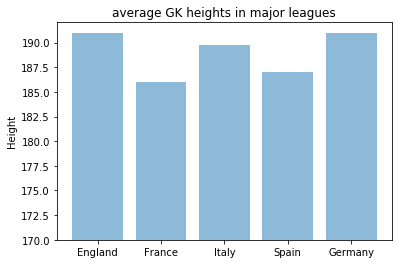

In [7]:

leagues = ('England', 'France', 'Italy', 'Spain', 'Germany')
y_pos = np.arange(len(leagues))
# y_pos=[170:200]
c=170
height = [191-c,186-c,189.8-c,187-c,190.99-c]

plt.bar(y_pos, height, align='center',bottom=170 , alpha=0.5)
plt.xticks(y_pos, leagues)
plt.ylabel('Height')
plt.title('average GK heights in major leagues')

plt.show()
# Tallest Gk playes in England and Germany

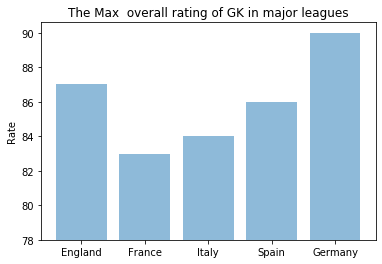

In [8]:
leagues = ('England', 'France', 'Italy', 'Spain', 'Germany')
y_pos = np.arange(len(leagues))
c=78
rank = [87-c,83-c,84-c,86-c,90-c]

plt.bar(y_pos, rank, align='center',bottom=78 , alpha=0.5)
plt.xticks(y_pos, leagues)
plt.ylabel('Rate')
plt.title('The Max  overall rating of GK in major leagues')

plt.show()

In [9]:
# display(pl_en_d)
pl_en_d['preferred_foot'].value_counts(normalize=True) * 100



# leagues = ('England', 'France', 'Italy', 'Spain', 'Germany')
# y_pos = np.arange(len(leagues))

right    73.08642
left     26.91358
Name: preferred_foot, dtype: float64

In [10]:
pl_fr_d['preferred_foot'].value_counts(normalize=True) * 100


right    77.283372
left     22.716628
Name: preferred_foot, dtype: float64

In [11]:
pl_gr_d['preferred_foot'].value_counts(normalize=True) * 100


right    76.280323
left     23.719677
Name: preferred_foot, dtype: float64

In [12]:
pl_it_d['preferred_foot'].value_counts(normalize=True) * 100


right    75.406032
left     24.593968
Name: preferred_foot, dtype: float64

In [13]:
pl_sp_d['preferred_foot'].value_counts(normalize=True) * 100

right    73.152709
left     26.847291
Name: preferred_foot, dtype: float64

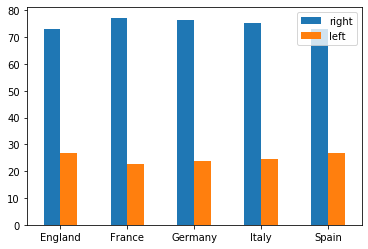

In [14]:
leagues = ('England', 'France', 'Germany', 'Italy', 'Spain')
y_pos = np.arange(len(leagues))
right=[73.08642,77.283372,76.280323,75.406032,73.152709]
left=[26.91358,22.716628,23.719677,24.593968,26.847291]
df = pd.DataFrame({'right': right,'left': left}, index=leagues)
ax = df.plot.bar(rot=0)